# Q1. Is it true that the home team is more likely to win?

We begin by initializing the CSV file. It is necessary to check its content and adapt it to our needs.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option("display.max_columns", None)

df = pd.read_csv('../laliga.csv')
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,NaN,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,NaN,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,NaN,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,NaN,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,NaN,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,NaN,Real Oviedo,UD Ibiza,NaN
48776,2021-2022,2,42,5/29/22,NaN,Real Sociedad B,Real Zaragoza,NaN
48777,2021-2022,2,42,5/29/22,NaN,Sporting Gijón,UD Las Palmas,NaN
48778,2021-2022,2,42,5/29/22,NaN,CD Tenerife,FC Cartagena,NaN


The necessary information is contained within the score column. Its information can be broken into two new columns, home goals and away goals, for better handling. And additional result column that uses the 1, 2 or X format can also be added.

In [50]:
df["local_score"] = df["score"].str.split(":").str[0]
df["away_score"] = df["score"].str.split(":").str[1]
df['results'] = df.apply(lambda row: 1 if row['local_score'] > row['away_score'] else (2 if row['away_score'] > row['local_score'] else ('X' if row['local_score'] == row['away_score'] else None)), axis=1)
df

,season,division,matchday,date,time,home_team,away_team,score,local_score,away_score,results
0,1928-1929,1,1,2/10/29,NaN,Arenas Club,Athletic Madrid,2:3,2,3,2
1,1928-1929,1,1,2/10/29,NaN,Espanyol,Real Unión,3:2,3,2,1
2,1928-1929,1,1,2/10/29,NaN,Real Madrid,Catalunya,5:0,5,0,1
3,1928-1929,1,1,2/10/29,NaN,Donostia,Athletic,1:1,1,1,X
4,1928-1929,1,1,2/12/29,NaN,Racing,Barcelona,0:2,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,NaN,Real Oviedo,UD Ibiza,NaN,NaN,NaN,None
48776,2021-2022,2,42,5/29/22,NaN,Real Sociedad B,Real Zaragoza,NaN,NaN,NaN,None
48777,2021-2022,2,42,5/29/22,NaN,Sporting Gijón,UD Las Palmas,NaN,NaN,NaN,None
48778,2021-2022,2,42,5/29/22,NaN,CD Tenerife,FC Cartagena,NaN,NaN,NaN,None


In [5]:
result_counts = df['results'].value_counts()
result_counts

results
1    25317
X    12280
2    10403
Name: count, dtype: int64

We can see that the amount of times the local team wins is way higher than the ties or defeats. So we can cocnlude that it is true that the local team is more likely to win. Now we can plot the corresponding data.

<Axes: ylabel='Match results'>

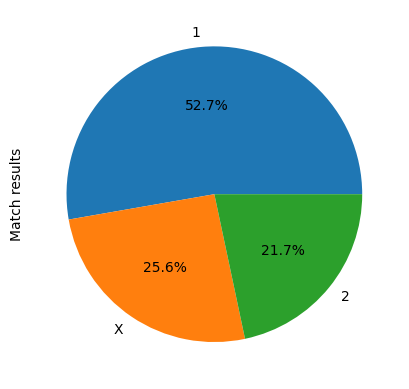

In [6]:
result_counts.plot(kind='pie', label ='Match results', autopct = '%1.1f%%')

As the results indicate, the local team wins more than half of the matches. Also, it is slightly more likely for the result to be a tie rather than a defeat of the local team.

# Q2. What are the top ten scoring teams of all time? What are the ten teams that concede the most? What have been the biggest wins?

We can use the columns created in the previous exercise for this one too. First, we will sum all the scored goals as a local for each team. We will do the same for away goals and sum them up.

Text(0.5, 1.0, 'Top 10 goal scorers')

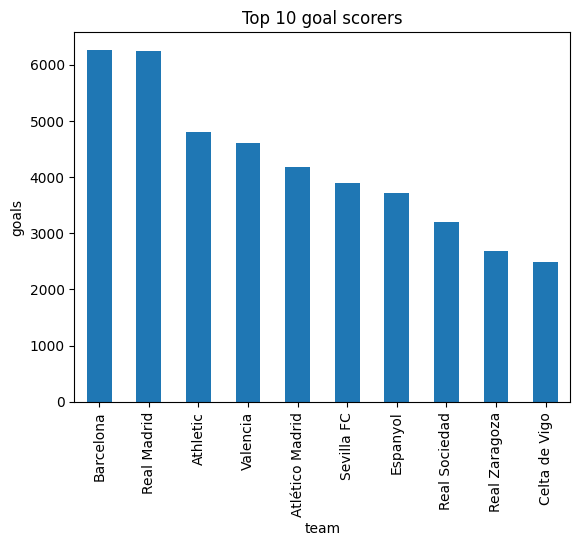

In [51]:

df = df.dropna(subset=['local_score'])
df = df.dropna(subset=['away_score'])
df['local_score'] = df['local_score'].astype(int)
df['away_score'] = df['away_score'].astype(int)
q2 = df
q2 = q2[q2['division'] == 1]
total_goals = q2.groupby('home_team')['local_score'].sum().reset_index()
total_goals = total_goals.rename(columns={'home_team':'team', 'local_score':'goals'})
away_goals = q2.groupby('away_team')['away_score'].sum().reset_index()
total_goals['goals'] += away_goals['away_score']
top10goals = total_goals.sort_values(by='goals', ascending=False).reset_index(drop=True).head(10)
top10goals.plot(x='team', y='goals', kind='bar', legend=False)
plt.xlabel('team')
plt.ylabel('goals')
plt.title('Top 10 goal scorers')

As expected, Barcelona and Real Madrid are the teams that have scored the most goals. Followed by Athletic which has never descended into second division. Now we repeat the process for the conceaded goals.

Text(0.5, 1.0, 'Top 10 goal conceders')

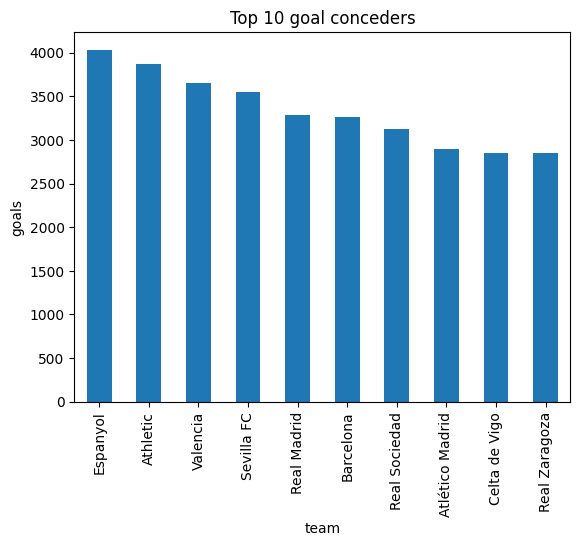

In [7]:
total_conceded = q2.groupby('home_team')['away_score'].sum().reset_index()
total_conceded = total_conceded.rename(columns={'home_team':'team', 'away_score':'conceded goals'})
away_conceded = q2.groupby('away_team')['local_score'].sum().reset_index()
total_conceded['conceded goals'] += away_conceded['local_score']
top10conceded = total_conceded.sort_values(by='conceded goals', ascending=False).reset_index(drop=True).head(10)
top10conceded.plot(x='team', y='conceded goals', kind='bar', legend=False)
plt.xlabel('team')
plt.ylabel('goals')
plt.title('Top 10 goal conceders')

The team that has conceded the most goals is Espanyol, this makes sense because it is a team that has spent many seasons in first division but is not one of the stronger teams.

In order to find out the biggest win, we will create another column called goal difference, which will be the difference between the local team goals and the away team goals. Another column with the absolute value is also necessary because the value would be negative if the match is a victory for the away team.

In [52]:
df['goal_diff'] = df['local_score'] - df['away_score']
df['abs_goal_diff'] = np.abs(df['goal_diff'])
df.sort_values(by = 'abs_goal_diff', ascending=False).reset_index(drop=True).head(10)

,season,division,matchday,date,time,home_team,away_team,score,local_score,away_score,results,goal_diff,abs_goal_diff
0,1940-1941,2,15,1/8/41,NaN,Real Sociedad,Real Valladolid,14:2,14,2,2,12,12
1,1956-1957,2,18,1/13/57,NaN,Real Gijón,Lérida,11:0,11,0,1,11,11
2,1930-1931,1,10,2/8/31,NaN,Athletic,Barcelona,12:1,12,1,1,11,11
3,1941-1942,1,1,9/28/41,NaN,Sevilla FC,Real Oviedo,10:0,10,0,1,10,10
4,1950-1951,1,11,11/19/50,NaN,Athletic,Lérida,10:0,10,0,1,10,10
5,1940-1941,1,1,9/29/40,NaN,Sevilla FC,Barcelona,11:1,11,1,1,10,10
6,1962-1963,2,9,11/11/62,NaN,Real Sociedad,CE Sabadell,11:1,11,1,1,10,10
7,1949-1950,2,1,9/4/49,NaN,CE Sabadell,SD Erandio Club,11:1,11,1,1,10,10
8,1941-1942,1,15,1/11/42,NaN,Athletic,Celta de Vigo,10:0,10,0,1,10,10
9,1957-1958,2,32,5/18/58,NaN,Tarrasa,La Felguera,10:1,10,1,1,9,9


These are the 10 biggest victories in the history of the first division of LaLiga.

# Q3. How have LaLiga's television rights changed game schedules in the last years?

To answer this, first we will create a new set that only contains the games that have a valid value for the time. Then, the data will be divided into two subsests for the 2000-2001 season and the 2020-2021 season.

C:\Users\peree\AppData\Local\Temp\ipykernel_36176\4162231926.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  q3_2000['date'] = pd.to_datetime(q3_2000['date'])
C:\Users\peree\AppData\Local\Temp\ipykernel_36176\4162231926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3_2000['date'] = pd.to_datetime(q3_2000['date'])
C:\Users\peree\AppData\Local\Temp\ipykernel_36176\4162231926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

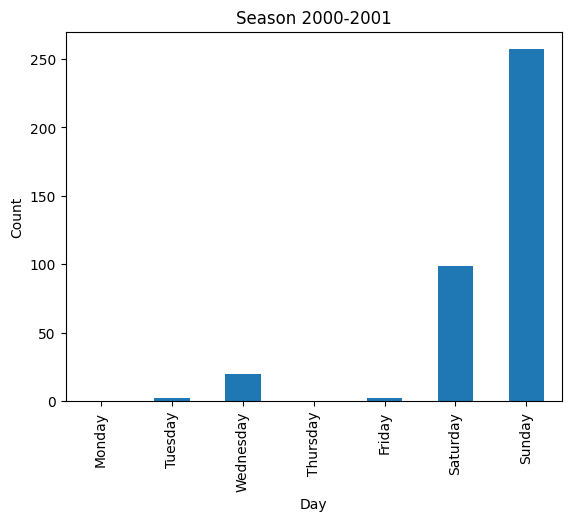

C:\Users\peree\AppData\Local\Temp\ipykernel_36176\4162231926.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  q3_2020['date'] = pd.to_datetime(q3_2020['date'])
C:\Users\peree\AppData\Local\Temp\ipykernel_36176\4162231926.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3_2020['date'] = pd.to_datetime(q3_2020['date'])
C:\Users\peree\AppData\Local\Temp\ipykernel_36176\4162231926.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

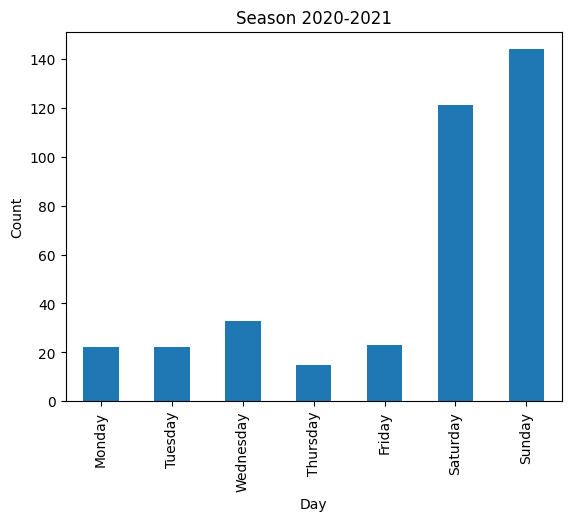

In [10]:
q3 = df
q3 = q3.dropna(subset=['time'])
q3 = q3[q3['division'] == 1]
q3_2000 = q3[q3['season'] == '2000-2001']
q3_2000['date'] = pd.to_datetime(q3_2000['date'])
q3_2000['day_of_week'] = q3_2000['date'].dt.day_name()
day_of_week_2000 = q3_2000['day_of_week'].value_counts()
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_2000 = day_of_week_2000.reindex(days_of_week_order, fill_value=0)
day_of_week_2000.plot(kind='bar', legend=False)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Season 2000-2001')
plt.show()
q3_2020 = q3[q3['season'] == '2020-2021']
q3_2020['date'] = pd.to_datetime(q3_2020['date'])
q3_2020['day_of_week'] = q3_2020['date'].dt.day_name()
day_of_week_2020 = q3_2020['day_of_week'].value_counts()
day_of_week_2020 = day_of_week_2020.reindex(days_of_week_order, fill_value=0)
day_of_week_2020.plot(kind='bar', legend=False)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Season 2020-2021')
plt.show()

We can observe that games used to only be played on the weekends. There used to be no games played from Monday to Friday. However, nowadays the games are still mostly played on the weekends but is possible to see more games played on other days of the week. Now we will repeat the same but with matchtime.

C:\Users\peree\AppData\Local\Temp\ipykernel_36176\3893681851.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  q3_2000['time'] = pd.to_datetime(q3_2000['time']).dt.strftime('%H:%M')
C:\Users\peree\AppData\Local\Temp\ipykernel_36176\3893681851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3_2000['time'] = pd.to_datetime(q3_2000['time']).dt.strftime('%H:%M')


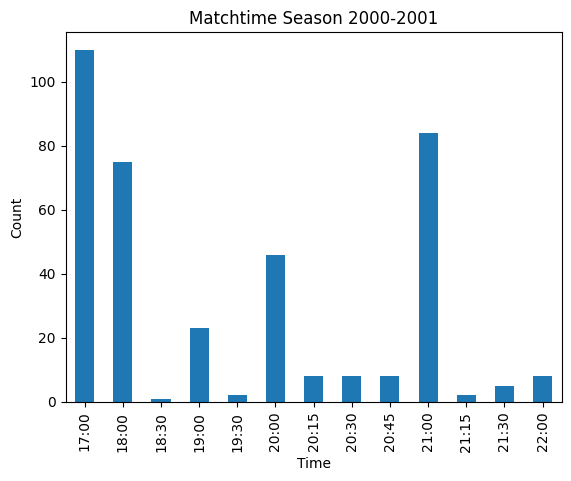

C:\Users\peree\AppData\Local\Temp\ipykernel_36176\3893681851.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  q3_2020['time'] = pd.to_datetime(q3_2020['time']).dt.strftime('%H:%M')
C:\Users\peree\AppData\Local\Temp\ipykernel_36176\3893681851.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3_2020['time'] = pd.to_datetime(q3_2020['time']).dt.strftime('%H:%M')


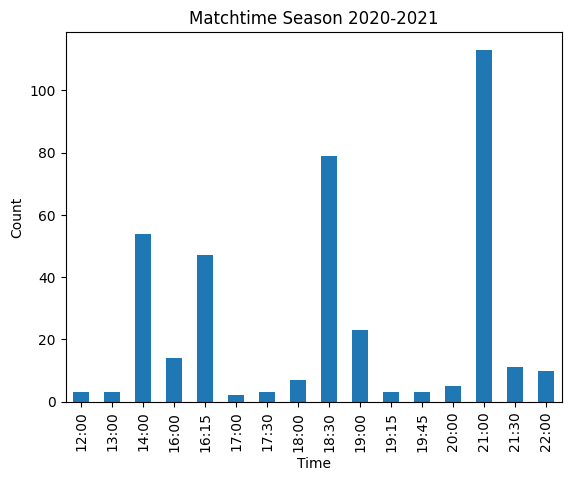

In [11]:
q3_2000['time'] = pd.to_datetime(q3_2000['time']).dt.strftime('%H:%M')
matchtime_2000 = q3_2000['time'].value_counts()
matchtime_2000.sort_index(inplace=True)
matchtime_2000.plot(kind='bar', legend=False)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Matchtime Season 2000-2001')
plt.show()
q3_2020['time'] = pd.to_datetime(q3_2020['time']).dt.strftime('%H:%M')
matchtime_2020 = q3_2020['time'].value_counts()
matchtime_2020.sort_index(inplace=True)
matchtime_2020.plot(kind='bar', legend=False)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Matchtime Season 2020-2021')
plt.show()

The main matchtime used to be 17:00, nowadays there is barely any game at that time. In the 2020-2021 season,there have been games played in more different hours than in the 2000-2001 season. Also, now there are more games played earlier and later than the most common time in the year 2000-2001.

# Q4. Cross results table by season and  division 

In order to do this, we need multiple functions. The first one is a function that abreviates team names in order to have a more appropiate display.

In [12]:
def abreviate_names(team_names):
    abreviations = {}
    for team in team_names:
        words = team.split()
        if words[0] == 'Real':
            abreviations[team] = 'R' + words[1][0:2].upper()
        elif len(words[0])<3:
            abreviations[team] = words[1][0:3].upper()
        else:
            abreviations[team] = words[0][0:3].upper()
    return abreviations

The next function sets the color of the cell according to the result and changes the brightness of the displayed resutl according to the goal difference.

In [13]:


def style_scores(score):
    if score == '-': return 'text-align: center'
    else:
        home_goals, away_goals = score.split(":")
        goal_diff = int(home_goals) - int(away_goals)
        if goal_diff < 0:
            return f'background-color:red; opacity: {abs(goal_diff)*20}%; color: white; text-align: center'
        elif goal_diff > 0:
            return f'background-color:green; opacity: {abs(goal_diff)*20}%; text-align: center'
        else:
            return 'background-color:#FFF380; color: black; text-align: center'	




Finally, a funciton to plot the table is created, it can be called for any valid season and division combination.

In [17]:
q4=df
def plot_cross_results_table(season, division):
    df = q4[(q4.season == season) & (q4.division == division)]
    team_names = df.away_team.drop_duplicates().reset_index(drop = True)
    df = df.replace({'away_team':abreviate_names(team_names)})
    table = pd.crosstab(df.home_team, df.away_team, rownames=['Home Team'], colnames=['Away Team'], values=df.score, aggfunc='first')
    table = table.fillna('-')
    ordered_columns = abreviate_names(table.index).values()
    table =  table[ordered_columns].style.applymap(style_scores)
    return table
plot_cross_results_table('2020-2021',1)

C:\Users\peree\AppData\Local\Temp\ipykernel_36176\1901681227.py:18: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  table =  table[ordered_columns].style.applymap(style_scores)


Away Team,ALA,ATH,ATL,BAR,OSA,CEL,CÁD,ELC,GET,GRA,LEV,RBE,RMA,RSO,RVA,EIB,HUE,SEV,VAL,VIL
Home Team,,,,,,,,,,,,,,,,,,,,
Alavés,-,1:0,1:2,1:1,0:1,1:3,1:1,0:2,0:0,4:2,2:2,0:1,1:4,0:0,1:0,2:1,1:0,1:2,2:2,2:1
Athletic,0:0,-,2:1,2:3,2:2,0:2,0:1,1:0,5:1,2:1,2:0,4:0,0:1,0:1,2:2,1:1,2:0,2:1,1:1,1:1
Atlético Madrid,1:0,2:1,-,1:0,2:1,2:2,4:0,3:1,1:0,6:1,0:2,2:0,1:1,2:1,2:0,5:0,2:0,2:0,3:1,0:0
Barcelona,5:1,2:1,0:0,-,4:0,1:2,1:1,3:0,5:2,1:2,1:0,5:2,1:3,2:1,1:0,1:1,4:1,1:1,2:2,4:0
CA Osasuna,1:1,1:0,1:3,0:2,-,2:0,3:2,2:0,0:0,3:1,1:3,0:2,0:0,0:1,0:0,2:1,1:1,0:2,3:1,1:3
Celta de Vigo,2:0,0:0,0:2,0:3,2:1,-,4:0,3:1,1:0,3:1,2:0,2:3,1:3,1:4,1:1,1:1,2:1,3:4,2:1,0:4
Cádiz CF,3:1,0:4,2:4,2:1,0:2,0:0,-,1:3,0:2,1:1,2:2,0:1,0:3,0:1,0:0,1:0,2:1,1:3,2:1,0:0
Elche CF,0:2,2:0,0:1,0:2,2:2,1:1,1:1,-,1:3,0:1,1:0,1:1,1:1,0:3,1:1,1:0,0:0,2:1,2:1,2:2
Getafe,0:0,1:1,0:0,1:0,1:0,1:1,0:1,1:1,-,0:1,2:1,3:0,0:0,0:1,0:1,0:1,1:0,0:1,3:0,1:3


# Q5.Direct confrontations

For this question we have decided to directly create a function that can plot the game results and goals between any two teams.

In [55]:
def plot_direct_confrontations_stats(team1, team2):
    filtered_df = df[(df['home_team'] == team1) & (df['away_team'] == team2) & ~df['results'].isna()]

    result_counts_team1_home= filtered_df['results'].value_counts()
    team1_home_victories = result_counts_team1_home.get(1, 0)
    result_counts_team2_away= filtered_df['results'].value_counts()
    team2_away_victories = result_counts_team2_away.get(2, 0)
    result_counts_ties= filtered_df['results'].value_counts()
    ties_team1_home= result_counts_ties.get("X", 0)

    goals_team1_home = filtered_df.groupby('home_team')['local_score'].sum().reset_index()
    goals_team2_away = filtered_df.groupby('away_team')['away_score'].sum().reset_index()



    filtered_df = df[(df['away_team'] == team1) & (df['home_team'] == team2) & ~df['results'].isna()]
    result_counts_team2_home= filtered_df['results'].value_counts()
    team2_home_victories = result_counts_team2_home.get(1, 0)
    result_counts_team1_away= filtered_df['results'].value_counts()
    team1_away_victories = result_counts_team1_away.get(2, 0)
    result_counts_ties= filtered_df['results'].value_counts()
    ties_team2_home= result_counts_ties.get("X", 0)

    goals_team2_home = filtered_df.groupby('home_team')['local_score'].sum().reset_index()
    goals_team1_away = filtered_df.groupby('away_team')['away_score'].sum().reset_index()

    sum_goals_team2_home = goals_team2_home['local_score'].sum()
    sum_goals_team2_away = goals_team2_away['away_score'].sum()
    sum_goals_team1_home = goals_team1_home['local_score'].sum()
    sum_goals_team1_away = goals_team1_away['away_score'].sum()

    Team2_victories=team2_away_victories+team2_home_victories
    Team1_victories=team1_away_victories+team1_home_victories
    TotalTies=ties_team1_home+ties_team2_home

    total_goals_team2 = sum_goals_team2_home + sum_goals_team2_away
    total_goals_team1 = sum_goals_team1_home + sum_goals_team1_away

    labels = [team2 + ' victories',team1 + ' victories', 'Total Ties']
    values = [Team2_victories,Team1_victories,TotalTies] 
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.show()

    labels = [team2 + ' Scored', team1 + ' Scored']
    values = [total_goals_team2, total_goals_team1]  # Absolute values

    # Use a custom format function to display values as integers
    def format_func(pct, values):
        total = sum(values)
        val = int(pct*total/100.0)
        return f'{val}'

    plt.pie(values, labels=labels, autopct=lambda pct: format_func(pct, values), startangle=140)
    plt.axis('equal')
    plt.show()

We can apply this function to check the data of Real Madrid and Barcelona.

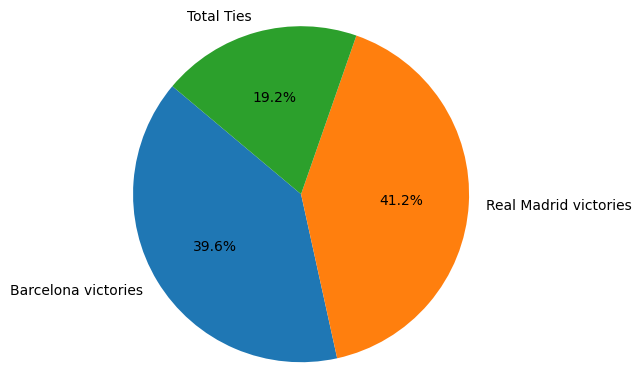

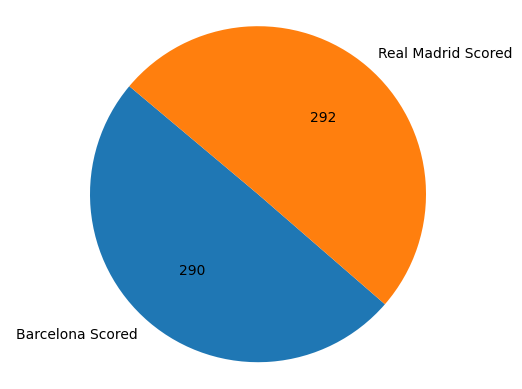

In [56]:
plot_direct_confrontations_stats('Real Madrid', 'Barcelona')

Now we can check any other two teams. We have decided to provide the example of Sevilla and Real Betis.

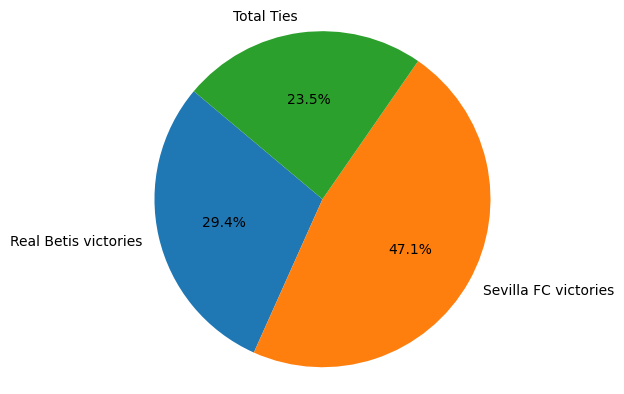

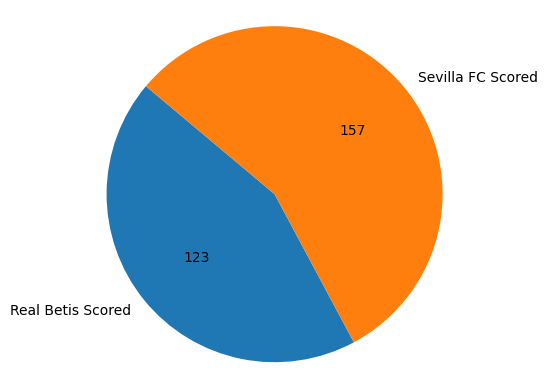

In [57]:
plot_direct_confrontations_stats('Sevilla FC', 'Real Betis')

# Q6. Longest undefeated Streaks

The strategy adopted to find the longest undefeated streaks that we have chosen is to create a dataframe with all the undefeated streaks that have been done (including one day streaks). Then we sort them and take the ten biggest. We have to do it like this because a single team may have multiple streaks in the top ten.

In [45]:
def team_streak(row, streak_table, team):
    global streak, beginning, end
    if (row['home_team'] == team and row['results'] != 2) or (row['away_team'] == team and row['results'] != 1):
        if beginning == 0:
            beginning = row['date']
        streak += 1
        end = row['date']
    else:
        if streak != 0:
            streak_table.loc[len(streak_table)] = [team, streak, beginning, end]
            streak = 0
            beginning = row['date']
    return row

streak = 0
beginning = 0
end = 0

def streak_finder(row, streak_table, df):
    global streak, beginning, end
    team_games = df[(df['home_team'] == row['home_team']) | (df['away_team'] == row['home_team'])]
    team = row['home_team']
    streak = 0
    beginning = 0
    end = 0
    team_games = team_games.apply(lambda row: team_streak(row, streak_table, team), axis = 1)
    return row


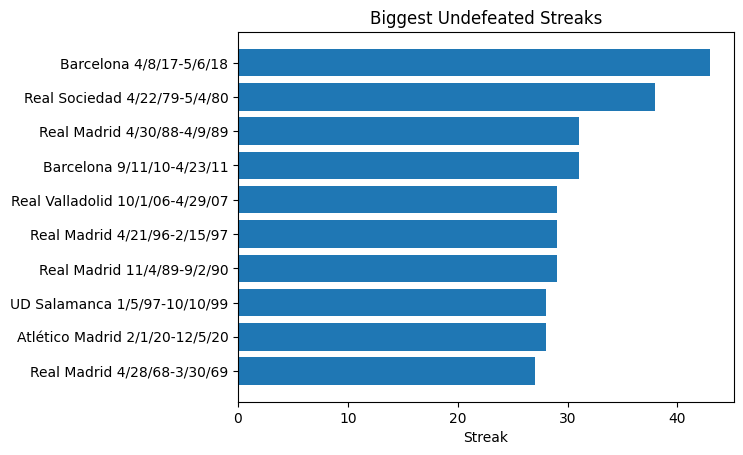

In [48]:
team_list_array = df['home_team'].unique()
team_list = pd.DataFrame(team_list_array, columns=['home_team'])
streak_table = pd.DataFrame()
streak_table['Team'] = None
streak_table['Streak'] = None
streak_table['Beginning'] = None
streak_table['End'] = None

team_list = team_list.apply(lambda row: streak_finder(row, streak_table, df), axis = 1)

streak_table = streak_table.sort_values(by = 'Streak', ascending=False).reset_index(drop = True)

top_10_streaks = streak_table.head(10)
plt.barh(top_10_streaks['Team'] + ' ' + top_10_streaks['Beginning'] + '-' + top_10_streaks['End'], top_10_streaks['Streak'])
plt.gca().invert_yaxis()
plt.xlabel('Streak')
plt.title('Biggest Undefeated Streaks')
plt.show()

The longest undefeated streak is done by Barcelona, which correctly checks up with the known data. Also, the information of Real Sociedad's streak has also been displayed correctly in this top. The function to obtain all possible streaks was necessary because Real Madrid has four streaks on the top ten.

# Q7. Create a file with the standings at the end of each season.

First, we have to group the teams by division and season.

In [5]:

df = df[df['season'] != '2021-2022']
season_standings = df.groupby(['season', 'division'])['home_team'].unique().reset_index()
season_standings = season_standings.explode('home_team').reset_index(drop=True)
season_standings.columns = ['Season', 'Division', 'Team']
season_standings['Rank'] = None
team_column = season_standings.pop('Team')
season_standings['Team'] = team_column
season_standings['GF'] = None
season_standings['GA'] = None
season_standings['GD'] = None
season_standings['W'] = None
season_standings['L'] = None
season_standings['T'] = None
season_standings['Pts'] = None

Then, we define the function that will set the values for the new table.

In [7]:

def set_seasons_result_table(row):   
    games_of_the_team = df[(df['season'] == row['Season']) & ((df['home_team'] == row['Team']) | (df['away_team'] == row['Team']))]
    home_games = games_of_the_team[games_of_the_team['home_team'] == row['Team']]
    away_games = games_of_the_team[games_of_the_team['away_team'] == row['Team']]
    row['GF'] = home_games['local_score'].sum() + away_games['away_score'].sum()
    row['GA'] = home_games['away_score'].sum() + away_games['local_score'].sum()
    row['GD'] = row['GF'] - row['GA']
    row['W'] = len(home_games[home_games['results'] == 1]) + len(away_games[away_games['results'] == 2])
    row['L'] = len(home_games[home_games['results'] == 2]) + len(away_games[away_games['results'] == 1])
    row['T'] = len(games_of_the_team[games_of_the_team['results'] == 'X'])
    row['Pts'] = row['W']*3 + row['T']
    return row

current_season = '2020-2021'
current_division = 1
current_rank = 1
def set_rank(row):
    global current_season, current_division, current_rank
    if row['Season'] != current_season or row['Division'] != current_division:
        current_rank = 1
        current_division = row['Division']
        current_season = row['Season']
        row['Rank'] = current_rank
        current_rank += 1
    else:
        row['Rank'] = current_rank
        current_rank += 1
    return row






We apply the function.

In [97]:
season_standings = season_standings.apply(lambda row: set_seasons_result_table(row), axis = 1)

Now we sort the standings and apply the correct rank

In [98]:

season_standings = season_standings.sort_values(by = ['Season','Division', 'Pts', 'GD', 'GF'], ascending=[False,True,False,False,False]).reset_index(drop = True)
season_standings = season_standings.apply(lambda row: set_rank(row), axis = 1)
season_standings


,Season,Division,Rank,Team,GF,GA,GD,W,L,T,Pts
0,2020-2021,1,1,Atlético Madrid,67,25,42,26,4,8,86
1,2020-2021,1,2,Real Madrid,67,28,39,25,4,9,84
2,2020-2021,1,3,Barcelona,85,38,47,24,7,7,79
3,2020-2021,1,4,Sevilla FC,53,33,20,24,9,5,77
4,2020-2021,1,5,Real Sociedad,59,38,21,17,10,11,62
...,...,...,...,...,...,...,...,...,...,...,...
2739,1928-1929,1,6,Athletic Madrid,43,41,2,8,8,2,26
2740,1928-1929,1,7,Espanyol,32,38,-6,7,7,4,25
2741,1928-1929,1,8,Catalunya,45,49,-4,6,8,4,22
2742,1928-1929,1,9,Real Unión,40,42,-2,5,11,2,17


Finally, we write the data in an excel file

In [99]:

season_standings.to_excel('../reports/SeasonStandings.xlsx', index=False)

# Q8. What impact had Fernando Roig's purchase over Villarreal's performance? Creating a funciton to plot a teams rank over time.

First we need to obtain Villareal's position at the end of each season and create a funciton to adjust the rank for second division teams. Then, we just need to plot it.

In [119]:
def adjust_rank(row):
    if row['Division'] == 2:
        first_division_size = len(season_standings[(season_standings['Season'] == row['Season']) & (season_standings['Division'] == 1)])
        row['Rank'] += first_division_size
        return row
    else: return row

Text(0.5, 1.0, 'Villarreal rank by season')

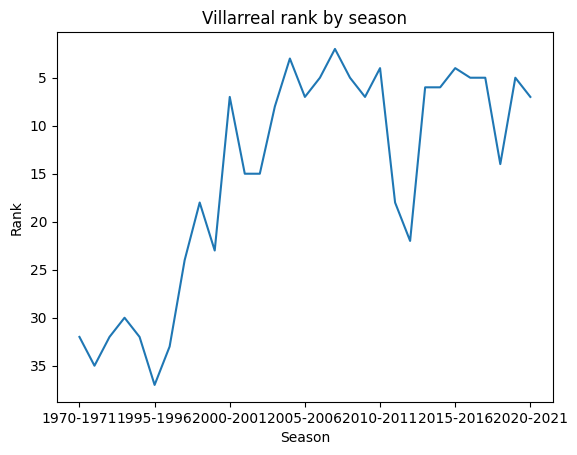

In [120]:
villarreal_rank = season_standings[season_standings['Team'] == 'Villarreal']
villarreal_rank = villarreal_rank.apply(lambda row: adjust_rank(row), axis = 1)
villarreal_rank = villarreal_rank.sort_values(by = 'Season', ascending = True).reset_index(drop = True)
villarreal_rank.plot(x = 'Season', y = 'Rank', legend = False)
plt.xlabel('Season')
plt.ylabel('Rank')
plt.gca().invert_yaxis()
plt.title('Villarreal rank by season')

Fernando Roig became the majority shareholder of Villarreal in the season 1997-1998. We can see that since then Villarreal has consistently played in the first divison with only a few exceptions.

Now we will write a function that can do this for any arbitray number of teams.

In [234]:
from matplotlib.ticker import MaxNLocator

def fill_empty_ranks(row, team_rank_history):
    if len(team_rank_history[team_rank_history['Season'] == row['Season']]) > 0:
        season_rank = team_rank_history[team_rank_history['Season'] == row['Season']]
        row['Rank'] = season_rank['Rank']
    else: row['Rank'] = np.nan
    return row

def historical_rank(*args, legend = False):
    season_and_rank = pd.DataFrame()
    season_and_rank['Season'] = season_standings['Season'].unique()
    season_and_rank['Rank'] = np.nan
    for arg in args:
        team_rank_history = season_standings[season_standings['Team'] == arg]
        team_rank_history = team_rank_history.apply(lambda row: adjust_rank(row), axis = 1)
        season_and_rank = season_and_rank.apply(lambda row: fill_empty_ranks(row, team_rank_history), axis = 1)
        season_and_rank = season_and_rank.sort_values(by = 'Season', ascending = True).reset_index(drop = True)
        plt.plot(season_and_rank['Season'], season_and_rank['Rank'], label = arg, marker='.', linestyle='-') 

    plt.xlabel('Season')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
    plt.xticks(rotation = 90)
    plt.ylabel('Rank')
    plt.gca().invert_yaxis()
    plt.title('Historical rank')
    plt.grid(True)
    if legend == True:
        plt.legend()
    plt.show()      

Now let's test the function

c:\Users\raulh\OneDrive\Escritorio\Màster\LaLiga\la-quiniela\venv\lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\raulh\OneDrive\Escritorio\Màster\LaLiga\la-quiniela\venv\lib\site-packages\matplotlib\cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)
c:\Users\raulh\OneDrive\Escritorio\Màster\LaLiga\la-quiniela\venv\lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\raulh\OneDrive\Escritorio\Màster\LaLiga\la-quiniela\venv\lib\site-packages\matplotlib\cbook.py:1345: FutureWarning: Calling float on a single elem

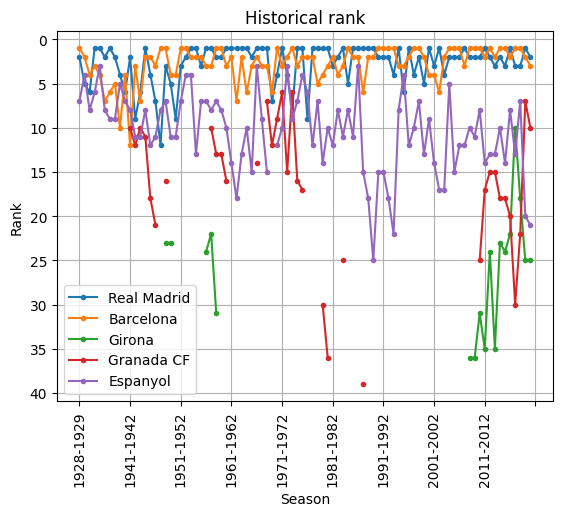

In [235]:
historical_rank('Real Madrid', 'Barcelona', 'Girona', 'Granada CF', 'Espanyol', legend = True)

And let's apply it to all teams playing in the first division in the season 2020-2021

c:\Users\raulh\OneDrive\Escritorio\Màster\LaLiga\la-quiniela\venv\lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\raulh\OneDrive\Escritorio\Màster\LaLiga\la-quiniela\venv\lib\site-packages\matplotlib\cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)
c:\Users\raulh\OneDrive\Escritorio\Màster\LaLiga\la-quiniela\venv\lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\raulh\OneDrive\Escritorio\Màster\LaLiga\la-quiniela\venv\lib\site-packages\matplotlib\cbook.py:1345: FutureWarning: Calling float on a single elem

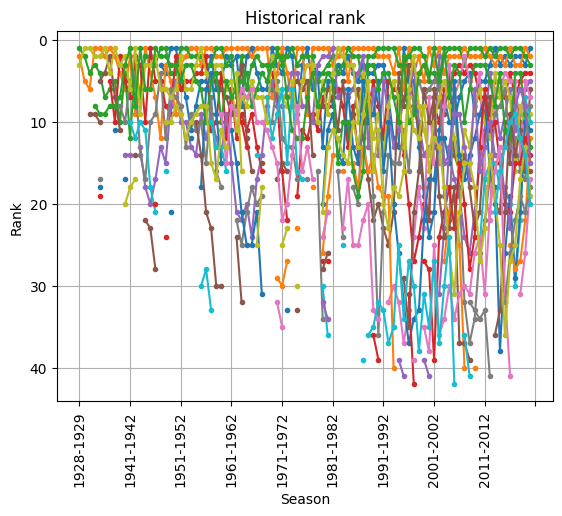

In [238]:
current_teams = season_standings[(season_standings['Season'] == '2020-2021') & (season_standings['Division'] == 1)]['Team']
historical_rank(*current_teams, legend = False)

# Q9. Which teams are the elevator teams?

To figure out the 'elevator teams', we need to see what teams have changed division the most times.

             Team  Div_Change
0  Dep. La Coruña          21
1          Racing          18
2   Celta de Vigo          18
3      Real Betis          15
4     Real Murcia          15


c:\Users\raulh\OneDrive\Escritorio\Màster\LaLiga\la-quiniela\venv\lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\raulh\OneDrive\Escritorio\Màster\LaLiga\la-quiniela\venv\lib\site-packages\matplotlib\cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)
c:\Users\raulh\OneDrive\Escritorio\Màster\LaLiga\la-quiniela\venv\lib\site-packages\matplotlib\cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
c:\Users\raulh\OneDrive\Escritorio\Màster\LaLiga\la-quiniela\venv\lib\site-packages\matplotlib\cbook.py:1345: FutureWarning: Calling float on a single elem

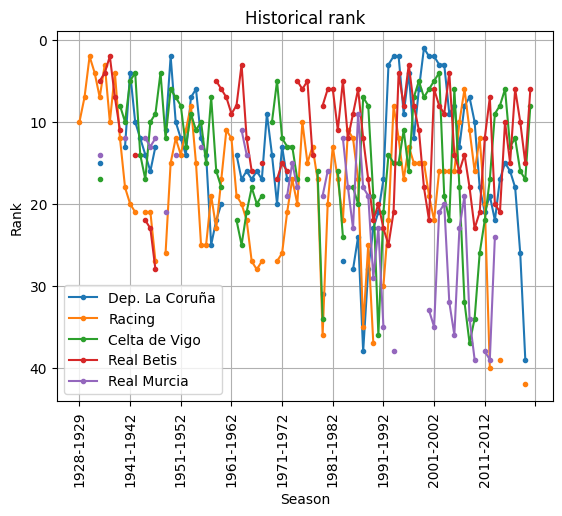

In [239]:
def elevator_function(row, season):
    team_matches = season[season['Team'] == row['Team']]
    team_matches['Division'] = team_matches['Division'].diff()
    row['Div_Change'] = (team_matches['Division'] != 0).sum()
    return row

all_teams = pd.DataFrame()
all_teams['Team'] = season_standings['Team'].unique()
all_teams['Div_Change'] = 0
all_teams = all_teams.apply(lambda row: elevator_function(row, season_standings), axis = 1)
all_teams = all_teams.sort_values(by = 'Div_Change', ascending = False).reset_index(drop=True)
top_elevators = all_teams.head(5)
print(top_elevators)
historical_rank(*top_elevators['Team'], legend = True)

These are the top five elevator teams. Deportive de La Coruña is the team that has changed divisions the most.

# Q10. Standings after each matchday.

In this section we have adopted a similar methodology to Q7. The necessary variables are defined and then a some functions are applied over them to create the dataset.

In [8]:
def set_teams(row):
    row['home_team'] = df[(df['season'] == row['season']) & (df['division'] == row['division'])]['home_team'].unique()
    return row

In [9]:
matchday_standings = df.groupby(['season', 'division'])['matchday'].unique().reset_index()
matchday_standings = matchday_standings.apply(lambda row: set_teams(row), axis = 1)
matchday_standings = matchday_standings.explode('matchday').reset_index(drop=True)
matchday_standings = matchday_standings.explode('home_team').reset_index(drop=True)
matchday_standings.columns = ['Season', 'Division', 'Matchday','Team']
matchday_standings['Rank'] = 0
teamm_column = matchday_standings.pop('Team')
matchday_standings['Team'] = teamm_column
matchday_standings['GF'] = 0
matchday_standings['GA'] = 0
matchday_standings['GD'] = 0
matchday_standings['W'] = 0
matchday_standings['L'] = 0
matchday_standings['T'] = 0
matchday_standings['Pts'] = 0
matchday_standings['Last 5'] = [[]] * len(matchday_standings)

In [20]:
def set_matchday_result_table(row):   
    games_of_the_team = df[(df['season'] == row['Season']) & (df['matchday'] == row['Matchday']) & ((df['home_team'] == row['Team']) | (df['away_team'] == row['Team']))]
    home_games = games_of_the_team[games_of_the_team['home_team'] == row['Team']]
    away_games = games_of_the_team[games_of_the_team['away_team'] == row['Team']]
    row['GF'] = home_games['local_score'].sum() + away_games['away_score'].sum()
    row['GA'] = home_games['away_score'].sum() + away_games['local_score'].sum()
    row['GD'] = row['GF'] - row['GA']
    row['W'] = len(home_games[home_games['results'] == 1]) + len(away_games[away_games['results'] == 2])
    row['L'] = len(home_games[home_games['results'] == 2]) + len(away_games[away_games['results'] == 1])
    row['T'] = len(games_of_the_team[games_of_the_team['results'] == 'X'])
    row['Pts'] = row['W']*3 + row['T']
    if row['W'] != 0:
        row['Last 5'] = 'W'
    elif row['L'] != 0:
        row['Last 5'] = 'L'
    elif row['T'] != 0:
        row['Last 5'] = 'T'
    else: row['Last 5'] = ''
    return row

def set_last_five(row, df):
    if row['Matchday'] == 1:
        return row
    elif row['Matchday'] == 2:
        previous_games = df[(df['Season'] == row['Season'])&(df['Team']==row['Team'])&(df['Matchday'] == row['Matchday'] - 1)]
        row['Last 5'] = previous_games['Last 5'].iloc[0] + '-' + row['Last 5']
        return row
    elif row['Matchday'] == 3:
        previous_games2 = df[(df['Season'] == row['Season'])&(df['Team']==row['Team'])&(df['Matchday'] == row['Matchday'] - 2)]
        previous_games = df[(df['Season'] == row['Season'])&(df['Team']==row['Team'])&(df['Matchday'] == row['Matchday'] - 1)]
        row['Last 5'] = previous_games2['Last 5'].iloc[0] + '-' + previous_games['Last 5'].iloc[0] + '-' + row['Last 5']
        return row
    elif row['Matchday'] == 4:
        previous_games3 = df[(df['Season'] == row['Season'])&(df['Team']==row['Team'])&(df['Matchday'] == row['Matchday'] - 3)]
        previous_games2 = df[(df['Season'] == row['Season'])&(df['Team']==row['Team'])&(df['Matchday'] == row['Matchday'] - 2)]
        previous_games = df[(df['Season'] == row['Season'])&(df['Team']==row['Team'])&(df['Matchday'] == row['Matchday'] - 1)]
        row['Last 5'] = previous_games3['Last 5'].iloc[0] + '-' + previous_games2['Last 5'].iloc[0] + '-' + previous_games['Last 5'].iloc[0] + '-' + row['Last 5']
        return row
    else:
        previous_games4 = df[(df['Season'] == row['Season'])&(df['Team']==row['Team'])&(df['Matchday'] == row['Matchday'] - 4)]
        previous_games3 = df[(df['Season'] == row['Season'])&(df['Team']==row['Team'])&(df['Matchday'] == row['Matchday'] - 3)]
        previous_games2 = df[(df['Season'] == row['Season'])&(df['Team']==row['Team'])&(df['Matchday'] == row['Matchday'] - 2)]
        previous_games = df[(df['Season'] == row['Season'])&(df['Team']==row['Team'])&(df['Matchday'] == row['Matchday'] - 1)]
        row['Last 5'] = previous_games4['Last 5'].iloc[0] +'-'+ previous_games3['Last 5'].iloc[0] + '-' + previous_games2['Last 5'].iloc[0] + '-' + previous_games['Last 5'].iloc[0] + '-' + row['Last 5']
        return row
    

def do_cumsum(df):
    grouped_data = df.groupby(['Season', 'Team'])
    df['GF'] = grouped_data['GF'].cumsum()
    df['GA'] = grouped_data['GA'].cumsum()
    df['GD'] = grouped_data['GD'].cumsum()
    df['W'] = grouped_data['W'].cumsum()
    df['L'] = grouped_data['L'].cumsum()
    df['T'] = grouped_data['T'].cumsum()
    df['Pts'] = grouped_data['Pts'].cumsum()
    df = df.apply(lambda row: set_last_five(row, df), axis = 1)
    return df

current_matchday = 1
def set_daily_rank(row):
    global current_season, current_division, current_rank, current_matchday
    if row['Season'] != current_season or row['Division'] != current_division or row['Matchday'] != current_matchday:
        current_rank = 1
        current_division = row['Division']
        current_season = row['Season']
        current_matchday = row['Matchday']
        row['Rank'] = current_rank
        current_rank += 1
    else:
        row['Rank'] = current_rank
        current_rank += 1
    return row

The file is saved because it takes a while to execute the code. This way, information can be accessed without the need to run these funcitons again.

In [21]:
matchday_standings = matchday_standings.apply(lambda row: set_matchday_result_table(row), axis = 1)
matchday_standings = do_cumsum(matchday_standings)
matchday_standings = matchday_standings.sort_values(by = ['Season','Division', 'Matchday', 'Pts', 'GD', 'GF'], ascending=[False,True,True,False,False,False]).reset_index(drop = True)
current_season = '2020-2021'
current_division = 1
current_rank = 1
matchday_standings = matchday_standings.apply(lambda row: set_daily_rank(row), axis = 1)
matchday_standings.to_excel('../reports/MatchdayStandings.xlsx', index=False)